<a href="https://colab.research.google.com/github/beckingr/MDST--Tutorial/blob/master/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn for scatterplot with hues
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [23]:
states_edu = pd.read_csv("states_edu.csv")
states_edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

In [24]:
print(states_edu.shape)
print(states_edu.columns)

(1715, 25)
Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


Use this space to rename columns, deal with missing data, etc. _(optional)_

In [25]:
# dropped rows with a null avg math 4 score, since that is the outcome we'll try to predict
states_edu.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset?

In [26]:
# @@@ 1
# more than 13, this is just the years where no 'avg_math_4_score' is missing
states_edu["YEAR"].unique().size

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [27]:
# @@@ 2
print("Michigan: ", states_edu[states_edu["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean())
print("Ohio: ", states_edu[states_edu["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean())
# Ohio has the higher average in 4th grade math scores

Michigan:  234.36363636363637
Ohio:  239.45454545454547


Find the average for your chosen test across all states in 2019

In [28]:
# @@@ 3
states_edu[states_edu["YEAR"] == 2019]["AVG_MATH_4_SCORE"].mean()

239.9433962264151

For each state, find a maximum value for your chosen test score

In [29]:
# @@@ 4
for state in states_edu["STATE"].unique():
    print(state, states_edu[states_edu["STATE"] == state]["AVG_MATH_4_SCORE"].max())

ALABAMA 233.0
ARIZONA 240.0
ARKANSAS 240.0
CALIFORNIA 235.0
COLORADO 247.0
CONNECTICUT 245.0
DELAWARE 243.0
DISTRICT_OF_COLUMBIA 235.0
FLORIDA 246.0
GEORGIA 240.0
HAWAII 243.0
IDAHO 242.0
INDIANA 249.0
IOWA 246.0
KENTUCKY 242.0
LOUISIANA 234.0
MAINE 246.0
MARYLAND 247.0
MASSACHUSETTS 253.0
MICHIGAN 238.0
MINNESOTA 253.0
MISSISSIPPI 241.0
MISSOURI 241.0
NEBRASKA 246.0
NEW_HAMPSHIRE 253.0
NEW_JERSEY 249.0
NEW_MEXICO 233.0
NEW_YORK 243.0
NORTH_CAROLINA 245.0
NORTH_DAKOTA 246.0
OHIO 246.0
OKLAHOMA 240.0
PENNSYLVANIA 246.0
RHODE_ISLAND 242.0
SOUTH_CAROLINA 238.0
TENNESSEE 241.0
TEXAS 244.0
UTAH 244.0
VIRGINIA 248.0
WEST_VIRGINIA 237.0
WISCONSIN 245.0
WYOMING 248.0
ILLINOIS 239.0
KANSAS 248.0
MONTANA 244.0
NEVADA 237.0
OREGON 240.0
VERMONT 248.0
ALASKA 237.0
SOUTH_DAKOTA 242.0
WASHINGTON 246.0
NATIONAL 242.0
DODEA 250.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [30]:
# @@@ 5
## 'Enroll_all' taken from the tutorial1 file
states_edu['ENROLL_ALL'] = states_edu['ENROLL'].fillna(states_edu["GRADES_PK_G"]+states_edu["GRADES_1_8_G"]+states_edu["GRADES_9_12_G"])
states_edu["local_revenue_per_student"] = states_edu["LOCAL_REVENUE"] / states_edu["ENROLL_ALL"]
states_edu["support_services_per_student"] = states_edu["SUPPORT_SERVICES_EXPENDITURE"] / states_edu["ENROLL_ALL"]

Feature engineering justification: I added an enroll all column so that I could calculate features 'per student', so that I can compare smaller school districts with larger ones. I also added local revenue and support services per student because I think they will both be strong predictors for the 4th graders' preformance; schools with more resources per student may see higher academic achievement.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='local_revenue_per_student', ylabel='support_services_per_student'>

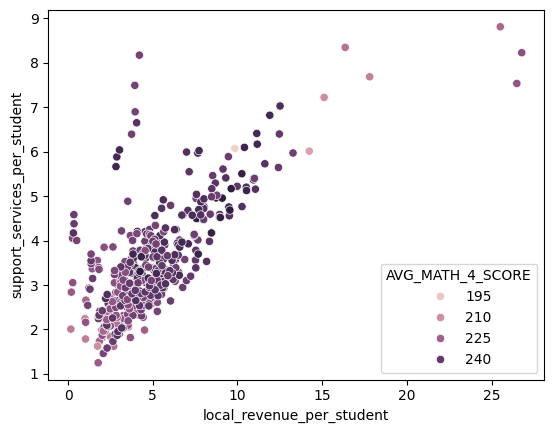

In [31]:
# @@@ 6
sb.scatterplot(data = states_edu, x="local_revenue_per_student", y="support_services_per_student", hue = "AVG_MATH_4_SCORE")

**Scatter plot of local expenditure vs support services per school, with average 4th grade math score as hue**

There seems to be a slight positive correlation between score, services, and revenue, but most of the points on the very high end of support services and expenditure have realativly low math scores, so I think further analysis is nessisary to determine whether there really is a correlation.

**Visualization 2**

<Axes: xlabel='AVG_MATH_4_SCORE', ylabel='support_services_per_student'>

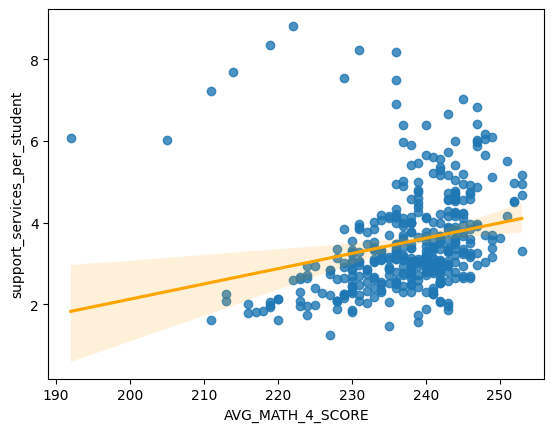

In [32]:
# @@@ 7
sb.regplot(data = states_edu, y="support_services_per_student", x="AVG_MATH_4_SCORE", line_kws = {"color": "orange"})

**Average 4th grade math score vs support services per student**

I am seeing a postive relationship between score and services here, but I still do see the outliers. The scores seem to be clustered around 240 or so, but there is some variation.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [33]:
from sklearn.model_selection import train_test_split

In [37]:
# @@@ 8

# X = local expenditure and support services per student
X = states_edu[['local_revenue_per_student','support_services_per_student']].dropna()
# y = 4th grade Math scores
y = states_edu.loc[X.index]['AVG_MATH_4_SCORE']

In [36]:
# @@@ 9

# only 13 years of test data, so use 70/30 split like the tutorial
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [38]:
# @@@ 10
from sklearn.linear_model import LinearRegression


In [39]:
# @@@ 11

model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [50]:
from sre_constants import error
# @@@ 12

# R^2, 0.027 is very low, so the predictors have very little correlation with the math score, which I didn't see from the graphs
print("R^2", model.score(X_test, y_test))

# root mean squared error formula from the tutorial
standard_error = np.mean((model.predict(X_test)-y_test)**2)**0.5
coefs = model.coef_
# 95% confidence intervals for the coeffs
print(coefs[0] - 2*standard_error, coefs[0] + 2*standard_error)
print(coefs[1] - 2*standard_error, coefs[1] + 2*standard_error)

# since both confidence intervels contain the value 0, we don't know even the direction of the relationship between the predictors and the math scores

R^2 0.027574764124956852
-17.38716977253691 16.739845567664428
-15.028173704162251 19.09884163603909


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

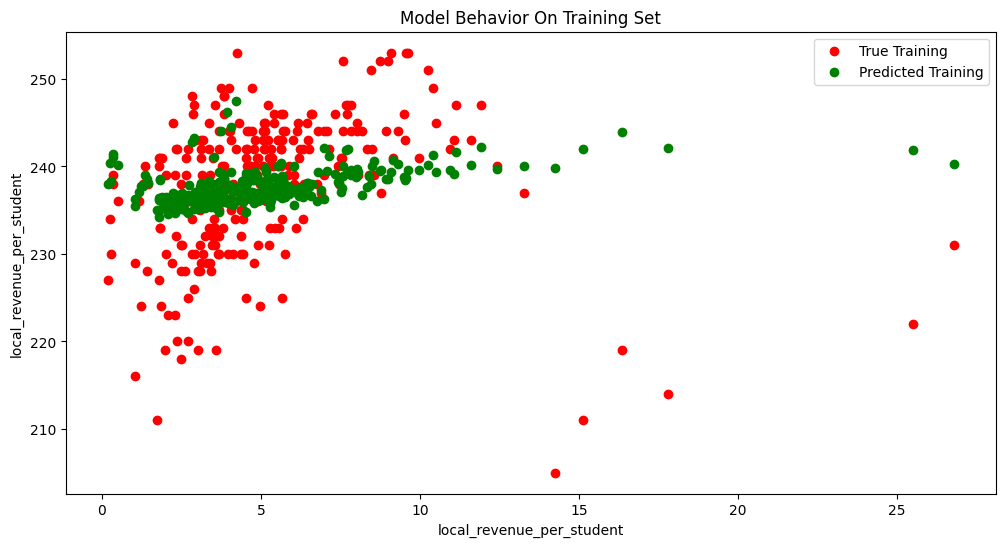

In [48]:
# @@@ 13

col_name = 'local_revenue_per_student'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('local_revenue_per_student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

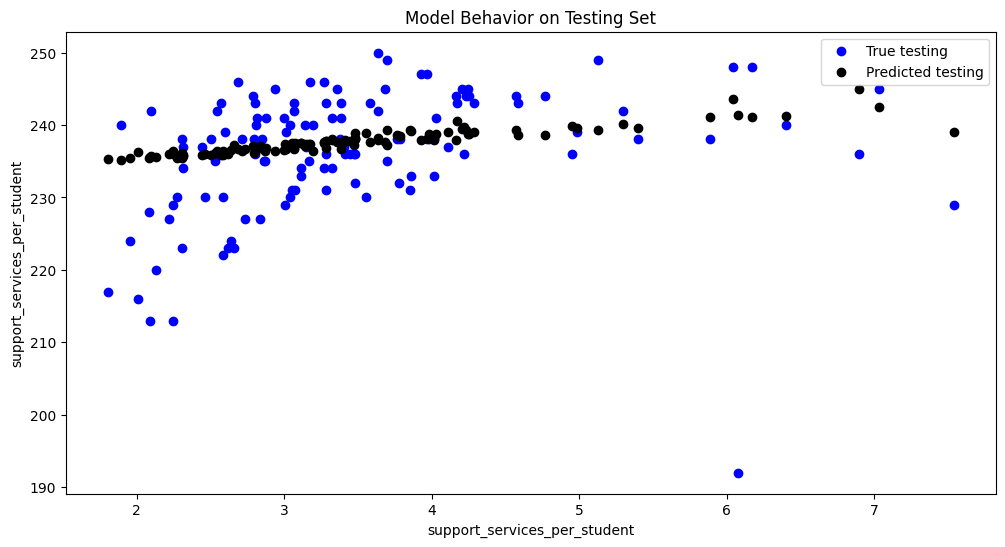

In [49]:
# @@@ 14


col_name = "support_services_per_student"


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('support_services_per_student')
plt.title("Model Behavior on Testing Set")